In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("workout_fitness_tracker_data.csv")
print(df.shape)
df.head()

(10000, 20)


,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [4]:
df.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.0,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.9,2748.428800,69.486500,38.4,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,0.0,717.109026,11.566763,0.0,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.9,1500.000000,50.000000,38.4,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.9,2124.000000,60.000000,38.4,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.9,2753.000000,69.000000,38.4,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.9,3360.000000,80.000000,38.4,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.9,3999.000000,89.000000,38.4,28.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [6]:
df['Workout Type'].value_counts()

Workout Type
HIIT        1731
Strength    1667
Yoga        1666
Cycling     1656
Cardio      1645
Running     1635
Name: count, dtype: int64

In [7]:
df['Mood Before Workout'].value_counts()

Mood Before Workout
Tired       2553
Happy       2511
Neutral     2511
Stressed    2425
Name: count, dtype: int64

In [8]:
df['Mood After Workout'].value_counts()

Mood After Workout
Neutral      3356
Energized    3323
Fatigued     3321
Name: count, dtype: int64

In [9]:
df.isnull().sum()

User ID                     0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64

In [10]:
categorical_columns = ['Gender', 'Workout Type']
df = pd.get_dummies(df, columns=categorical_columns)

le = LabelEncoder()
df['Workout Intensity'] = le.fit_transform(df['Workout Intensity'])
df.head(10)

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,...,Mood After Workout,Gender_Female,Gender_Male,Gender_Other,Workout Type_Cardio,Workout Type_Cycling,Workout Type_HIIT,Workout Type_Running,Workout Type_Strength,Workout Type_Yoga
0,1,39,175,99,79,384,112,8850,14.44,0,...,Fatigued,False,True,False,False,True,False,False,False,False
1,2,36,157,112,73,612,168,2821,1.10,0,...,Energized,False,False,True,True,False,False,False,False,False
2,3,25,180,66,27,540,133,18898,7.28,0,...,Fatigued,True,False,False,False,False,True,False,False,False
3,4,56,154,89,39,672,118,14102,6.55,2,...,Neutral,False,True,False,False,True,False,False,False,False
4,5,53,194,59,56,410,170,16518,3.17,2,...,Energized,False,False,True,False,False,False,False,True,False
5,6,33,162,81,11,301,142,10895,6.53,1,...,Neutral,False,True,False,False,False,False,False,False,True
6,7,48,151,82,109,351,114,4687,6.47,1,...,Neutral,True,False,False,False,False,False,False,True,False
7,8,59,189,61,83,518,159,11234,7.64,2,...,Neutral,False,True,False,False,False,False,False,True,False
8,9,37,182,113,25,226,123,9372,13.24,1,...,Neutral,False,False,True,False,False,False,True,False,False
9,10,45,198,74,60,265,171,19073,8.52,0,...,Energized,True,False,False,False,True,False,False,False,False


In [11]:
df['Workout Intensity'].value_counts()

Workout Intensity
1    3357
2    3323
0    3320
Name: count, dtype: int64

In [12]:
Mood_Before_Workout = {
    'Tired':1,
    'Stressed':1,
    'Neutral':0,
    'Happy':0
}
Mood_After_Workout = {
    'Fatigued':1,
    'Neutral':1,
    'Energized':0
}
df['Mood Before Workout'] = df['Mood Before Workout'].str.strip().str.title().map(Mood_Before_Workout)
df['Mood After Workout'] = df['Mood After Workout'].str.strip().str.title().map(Mood_After_Workout)
df['Dropout'] = df['Mood Before Workout'] * df['Mood After Workout'] 
df.head(10)


,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,...,Gender_Female,Gender_Male,Gender_Other,Workout Type_Cardio,Workout Type_Cycling,Workout Type_HIIT,Workout Type_Running,Workout Type_Strength,Workout Type_Yoga,Dropout
0,1,39,175,99,79,384,112,8850,14.44,0,...,False,True,False,False,True,False,False,False,False,1
1,2,36,157,112,73,612,168,2821,1.10,0,...,False,False,True,True,False,False,False,False,False,0
2,3,25,180,66,27,540,133,18898,7.28,0,...,True,False,False,False,False,True,False,False,False,0
3,4,56,154,89,39,672,118,14102,6.55,2,...,False,True,False,False,True,False,False,False,False,0
4,5,53,194,59,56,410,170,16518,3.17,2,...,False,False,True,False,False,False,False,True,False,0
5,6,33,162,81,11,301,142,10895,6.53,1,...,False,True,False,False,False,False,False,False,True,0
6,7,48,151,82,109,351,114,4687,6.47,1,...,True,False,False,False,False,False,False,True,False,0
7,8,59,189,61,83,518,159,11234,7.64,2,...,False,True,False,False,False,False,False,True,False,0
8,9,37,182,113,25,226,123,9372,13.24,1,...,False,False,True,False,False,False,True,False,False,1
9,10,45,198,74,60,265,171,19073,8.52,0,...,True,False,False,False,True,False,False,False,False,0


In [13]:
df.isnull().sum()

User ID                     0
Age                         0
Height (cm)                 0
Weight (kg)                 0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
Gender_Female               0
Gender_Male                 0
Gender_Other                0
Workout Type_Cardio         0
Workout Type_Cycling        0
Workout Type_HIIT           0
Workout Type_Running        0
Workout Type_Strength       0
Workout Type_Yoga           0
Dropout                     0
dtype: int64

In [14]:
df['Dropout'].value_counts()

Dropout
0    6697
1    3303
Name: count, dtype: int64

In [15]:
X = df.drop(['Dropout'], axis=1)
y = df['Dropout']

In [16]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Convert to tensors
X_train = torch.from_numpy(np.array(X_train)).float()
y_train = torch.from_numpy(np.array(y_train)).float().reshape(-1, 1)
X_test = torch.from_numpy(np.array(X_test)).float()
y_test = torch.from_numpy(np.array(y_test)).float().reshape(-1, 1)

In [18]:
# Define MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [19]:
# Initialize model, loss, optimizer
model = MLP(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
# Training loop
losses = []
for epoch in range(20):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

Epoch 1, Loss: 0.7082
Epoch 2, Loss: 0.7023
Epoch 3, Loss: 0.6967
Epoch 4, Loss: 0.6912
Epoch 5, Loss: 0.6858
Epoch 6, Loss: 0.6805
Epoch 7, Loss: 0.6754
Epoch 8, Loss: 0.6704
Epoch 9, Loss: 0.6655
Epoch 10, Loss: 0.6607
Epoch 11, Loss: 0.6560
Epoch 12, Loss: 0.6514
Epoch 13, Loss: 0.6468
Epoch 14, Loss: 0.6423
Epoch 15, Loss: 0.6379
Epoch 16, Loss: 0.6335
Epoch 17, Loss: 0.6291
Epoch 18, Loss: 0.6248
Epoch 19, Loss: 0.6205
Epoch 20, Loss: 0.6162


In [21]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    predictions = (outputs >= 0.5)
    y_true = y_test.numpy()
    y_pred = predictions.numpy()

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

C:\Users\Mr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
print(f'Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Accuracy: 0.6713
F1-Score: 0.0000
Precision: 0.0000
Recall: 0.0000


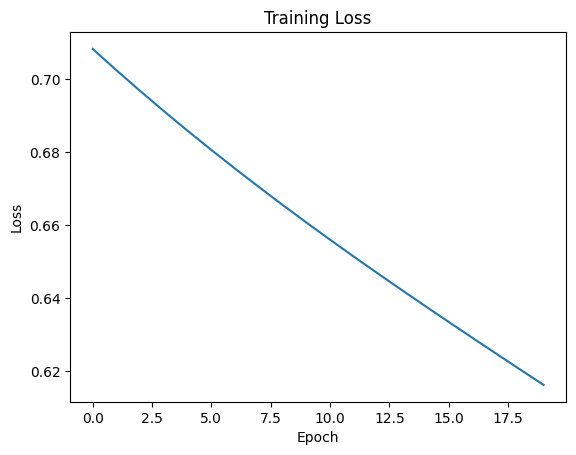

In [23]:
# Plot training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()